<a href="https://colab.research.google.com/github/Sanja2000/Chennai-House-Price/blob/main/chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHENNAI HOUSE PRICE PREDICTION**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('/content/train-chennai-sale.csv')

In [66]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,...,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,1.872981
1,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,...,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,1.601032
2,P00219,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,...,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,1.368569
3,P09105,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,...,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,1.800944
4,P09679,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,...,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,1.872981


**DATA CLEANING**

CHECKING THE NO OF NULL VALUES IN EACH COLUMN

In [67]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
INF_PRICE         0
1+0.04            0
POWER(Z,Y)        0
dtype: int64

Converting all the column names to lower case letters

In [68]:
df.columns= df.columns.str.lower()
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'date_build', 'buildtype',
       'utility_avail', 'street', 'mzzone', 'qs_rooms', 'qs_bathroom',
       'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price',
       'inf_price', '1+0.04', 'power(z,y)'],
      dtype='object')

In [69]:
df.tail()

,prt_id,area,int_sqft,date_sale,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,...,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,inf_price,1+0.04,"power(z,y)"
7104,P05438,T Nagar,1733,24-02-2010,1.0,1.0,4,Ab Normal,Yes,02-03-1985,...,3.4,3.7,2.1,2.89,702058,312026,19501600,3.122269e+07,1.04,1.601032
7105,P05042,Karapakkam,666,11-05-2010,1.0,1.0,2,Adj Land,Yes,20-05-1974,...,3.2,4.4,2.5,3.28,273317,74541,6211750,9.945212e+06,1.04,1.601032
7106,P10000,Velachery,1897,08-04-2004,3.0,2.0,5,Family,Yes,11-04-1995,...,3.6,4.5,3.3,3.92,346191,205551,10818480,2.191626e+07,1.04,2.025817
7107,P06508,Karapakkam,787,03-08-2009,1.0,1.0,2,Partial,Yes,11-08-1977,...,4.6,3.8,4.1,4.16,425350,119098,8507000,1.416478e+07,1.04,1.665074
7108,P09794,Velachery,1896,13-07-2005,3.0,2.0,5,Partial,Yes,24-07-1961,...,3.1,3.5,4.3,3.64,349177,79812,9976480,1.943319e+07,1.04,1.947900


Checking the data types of each column

In [70]:
result = df.dtypes
result

prt_id            object
area              object
int_sqft           int64
date_sale         object
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
reg_fee            int64
commis             int64
sales_price        int64
inf_price        float64
1+0.04           float64
power(z,y)       float64
dtype: object

Dropping the power(z,y) column which is of no use.

In [71]:
san = df.drop('power(z,y)',axis='columns',inplace=True)

In [72]:
df.head()

,prt_id,area,int_sqft,date_sale,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,...,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,inf_price,1+0.04
0,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04
1,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04
2,P00219,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,...,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04
3,P09105,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,...,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04
4,P09679,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,...,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04


Dropping all the null values in the dataset

In [73]:
saj = df.dropna(inplace=True)

Converting the date_sale and date_build column to date,month&year format

In [74]:
df.date_sale = pd.to_datetime(df.date_sale, format = '%d-%m-%Y')
df.date_build = pd.to_datetime(df.date_build, format = '%d-%m-%Y')

Subtracting the date_sale and date_build to find te exact age of the property

In [75]:
df['property_age'] = pd.DatetimeIndex(df.date_sale).year-pd.DatetimeIndex(df.date_build).year

Adding the commis and regfee column to get the total_price of the property

In [76]:
df['total_price'] = pd.DataFrame(df.commis + df.reg_fee + df.sales_price)

In [77]:
df.head()

,prt_id,area,int_sqft,date_sale,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,...,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,inf_price,1+0.04,property_age,total_price
0,P09411,Anna Nagar,1986,2006-12-19,2.0,1.0,5,Ab Normal,No,1995-12-22,...,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,11,22781941
1,P05346,Velachery,1855,2010-03-13,3.0,2.0,5,Family,No,1988-03-18,...,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,22,10063653
2,P00219,Chrompet,1220,2014-09-11,2.0,1.0,4,Partial,No,2009-09-12,...,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,5,13002093
3,P09105,Chrompet,1167,2007-04-05,1.0,1.0,3,Partial,No,1979-04-12,...,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,28,8785897
4,P09679,Velachery,1847,2006-03-13,3.0,2.0,5,Family,No,1996-03-15,...,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,10,17640263


Printing the duplicate values of all columns

In [78]:
df.loc[df.duplicated(keep=False)]

,prt_id,area,int_sqft,date_sale,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,...,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,inf_price,1+0.04,property_age,total_price


Dropping the duplicate values in the dataset

In [79]:
P = df.drop_duplicates(keep='first')

In [80]:
df.isnull().sum()

prt_id           0
area             0
int_sqft         0
date_sale        0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
inf_price        0
1+0.04           0
property_age     0
total_price      0
dtype: int64

In [81]:
san = df.dropna(inplace=True)
san

In [82]:
df.isnull().sum()

prt_id           0
area             0
int_sqft         0
date_sale        0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
inf_price        0
1+0.04           0
property_age     0
total_price      0
dtype: int64

In [83]:
df.area

0       Anna Nagar
1        Velachery
2         Chrompet
3         Chrompet
4        Velachery
           ...    
7104       T Nagar
7105    Karapakkam
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: area, Length: 7056, dtype: object

**EXPLORATORY DATA ANALYSIS**

CHECKING THE LINEAR RELATIONSHIP BETWEEN THE FEATURE AND TARGET VARIABLES

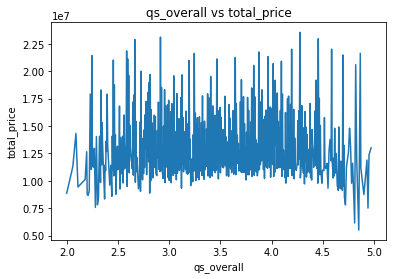

,qs_overall,total_price
qs_overall,1.00000,0.02058
total_price,0.02058,1.00000


In [84]:
df.groupby('qs_overall')['total_price'].mean().plot()
plt.title('qs_overall vs total_price')
plt.xlabel('qs_overall')
plt.ylabel('total_price')
plt.show()
df[['qs_overall','total_price']].corr()

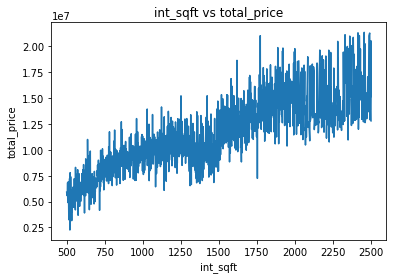

,int_sqft,total_price
int_sqft,1.000000,0.620543
total_price,0.620543,1.000000


In [85]:
df.groupby('int_sqft')['total_price'].mean().plot()
plt.title('int_sqft vs total_price')
plt.xlabel('int_sqft')
plt.ylabel('total_price')
plt.show()
df[['int_sqft','total_price']].corr()

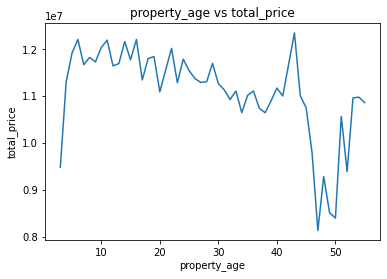

,property_age,total_price
property_age,1.000000,-0.121089
total_price,-0.121089,1.000000


In [86]:
df.groupby('property_age')['total_price'].mean().plot()
plt.title('property_age vs total_price')
plt.xlabel('property_age')
plt.ylabel('total_price')
plt.show()
df[['property_age','total_price']].corr()

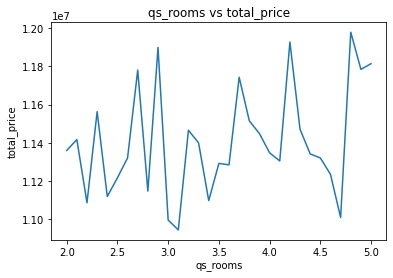

,qs_rooms,total_price
qs_rooms,1.000000,0.022213
total_price,0.022213,1.000000


In [87]:
df.groupby('qs_rooms')['total_price'].mean().plot()
plt.title('qs_rooms vs total_price')
plt.xlabel('qs_rooms')
plt.ylabel('total_price')
plt.show()
df[['qs_rooms','total_price']].corr()

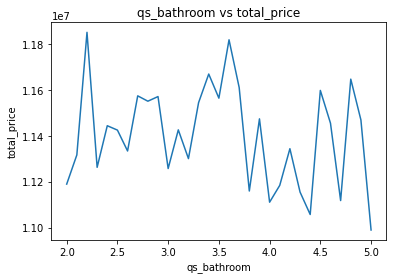

,qs_bathroom,total_price
qs_bathroom,1.00000,-0.01208
total_price,-0.01208,1.00000


In [88]:
df.groupby('qs_bathroom')['total_price'].mean().plot()
plt.title('qs_bathroom vs total_price')
plt.xlabel('qs_bathroom')
plt.ylabel('total_price')
plt.show()
df[['qs_bathroom','total_price']].corr()

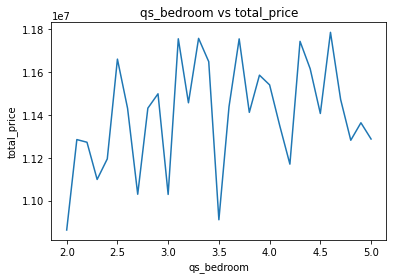

,qs_bedroom,total_price
qs_bedroom,1.000000,0.020403
total_price,0.020403,1.000000


In [89]:
df.groupby('qs_bedroom')['total_price'].mean().plot()
plt.title('qs_bedroom vs total_price')
plt.xlabel('qs_bedroom')
plt.ylabel('total_price')
plt.show()
df[['qs_bedroom','total_price']].corr()

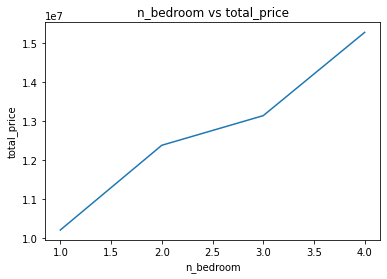

,n_bedroom,total_price
n_bedroom,1.000000,0.342891
total_price,0.342891,1.000000


In [90]:
df.groupby('n_bedroom')['total_price'].mean().plot()
plt.title('n_bedroom vs total_price')
plt.xlabel('n_bedroom')
plt.ylabel('total_price')
plt.show()
df[['n_bedroom','total_price']].corr()

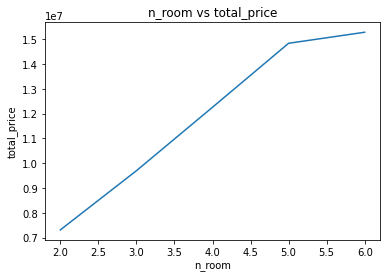

,n_room,total_price
n_room,1.000000,0.609996
total_price,0.609996,1.000000


In [91]:
df.groupby('n_room')['total_price'].mean().plot()
plt.title('n_room vs total_price')
plt.xlabel('n_room')
plt.ylabel('total_price')
plt.show()
df[['n_room','total_price']].corr()

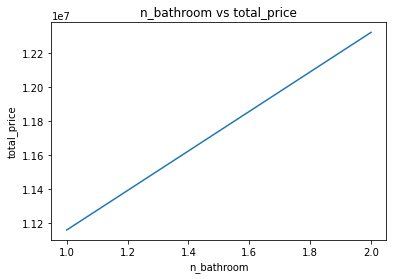

,n_bathroom,total_price
n_bathroom,1.000000,0.120698
total_price,0.120698,1.000000


In [92]:
df.groupby('n_bathroom')['total_price'].mean().plot()
plt.title('n_bathroom vs total_price')
plt.xlabel('n_bathroom')
plt.ylabel('total_price')
plt.show()
df[['n_bathroom','total_price']].corr()

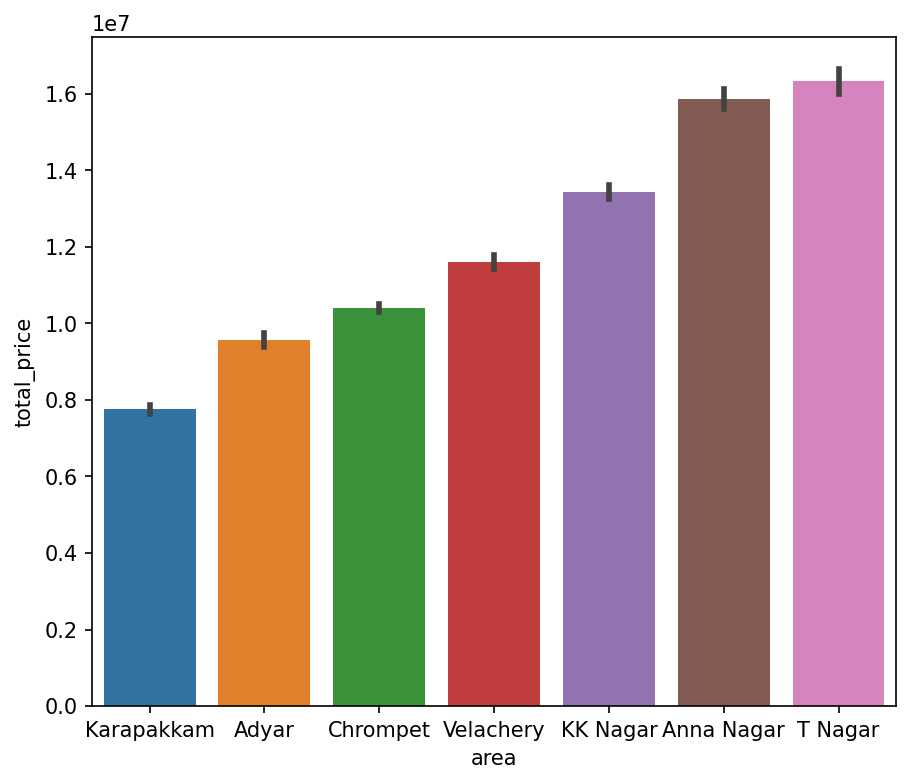

In [93]:
plt.figure(figsize=(22, 13), dpi=150)
plt.subplot2grid((2,6),(0,0), colspan=2)
sns.barplot(x=df.area, y=df.total_price, order=df.groupby('area')['total_price'].mean().reset_index().sort_values('total_price')['area'])

Plotting the categorical feature variables

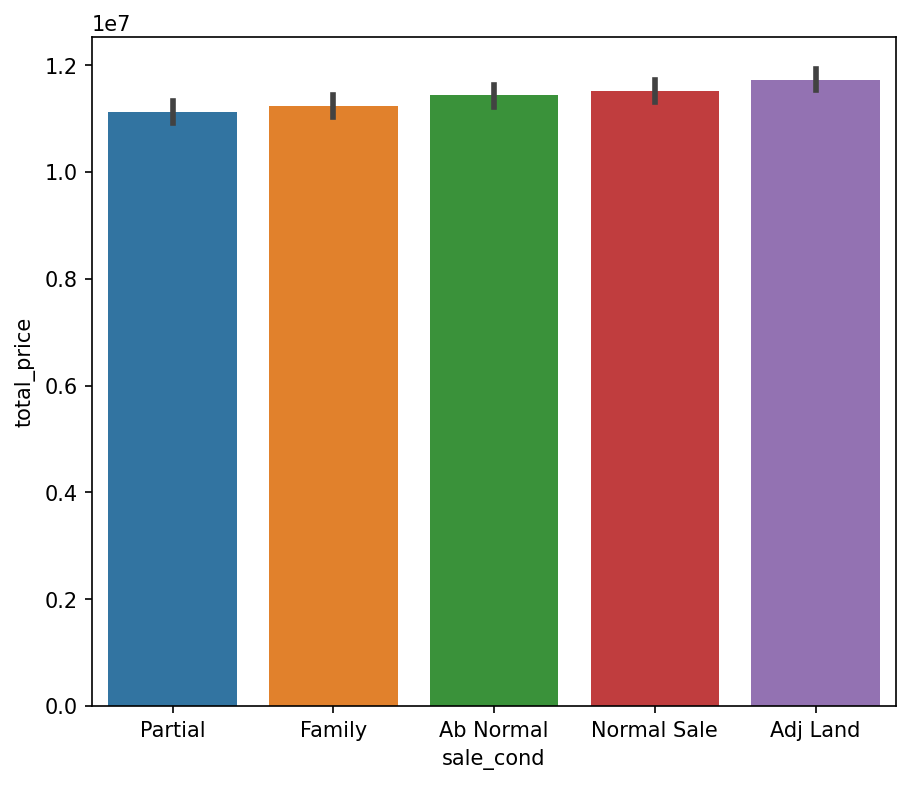

In [94]:
plt.figure(figsize=(22, 13), dpi=150)
plt.subplot2grid((2,6),(0,0), colspan=2)
sns.barplot(x=df.sale_cond, y=df.total_price, order=df.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

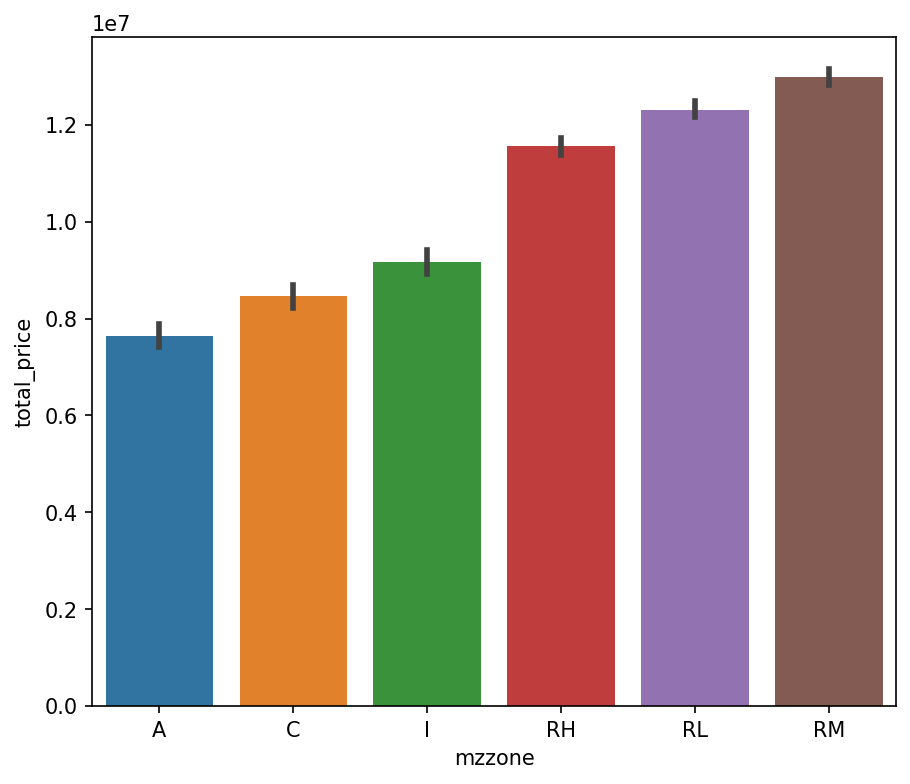

In [95]:
plt.figure(figsize=(22, 13), dpi=150)
plt.subplot2grid((2,6),(0,0), colspan=2)
sns.barplot(x=df.mzzone, y=df.total_price, order=df.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

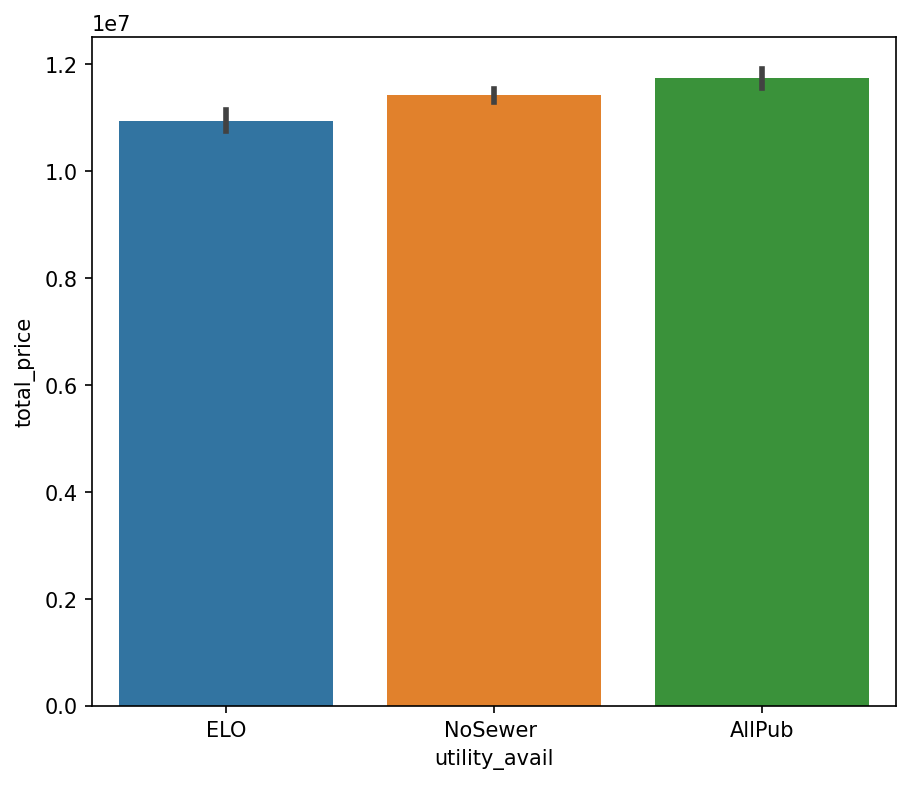

In [96]:
plt.figure(figsize=(22, 13), dpi=150)
plt.subplot2grid((2,6),(0,0), colspan=2)
sns.barplot(x=df.utility_avail, y=df.total_price, order=df.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

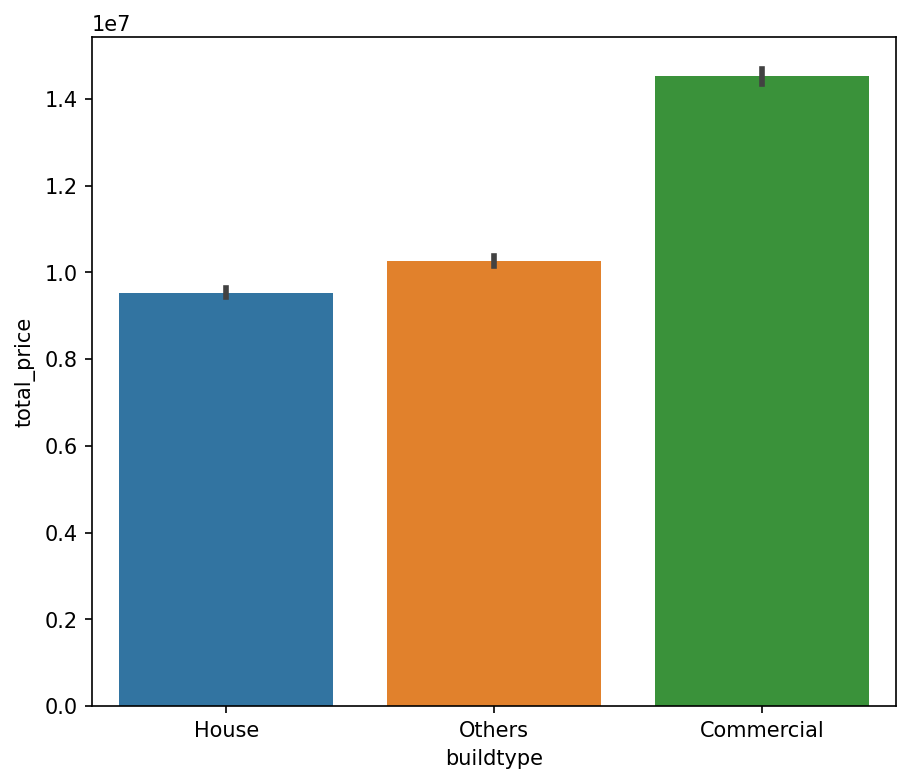

In [97]:
plt.figure(figsize=(22, 13), dpi=150)
plt.subplot2grid((2,6),(0,0), colspan=2)
sns.barplot(x=df.buildtype, y=df.total_price, order=df.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

In [98]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'date_build', 'buildtype',
       'utility_avail', 'street', 'mzzone', 'qs_rooms', 'qs_bathroom',
       'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price',
       'inf_price', '1+0.04', 'property_age', 'total_price'],
      dtype='object')

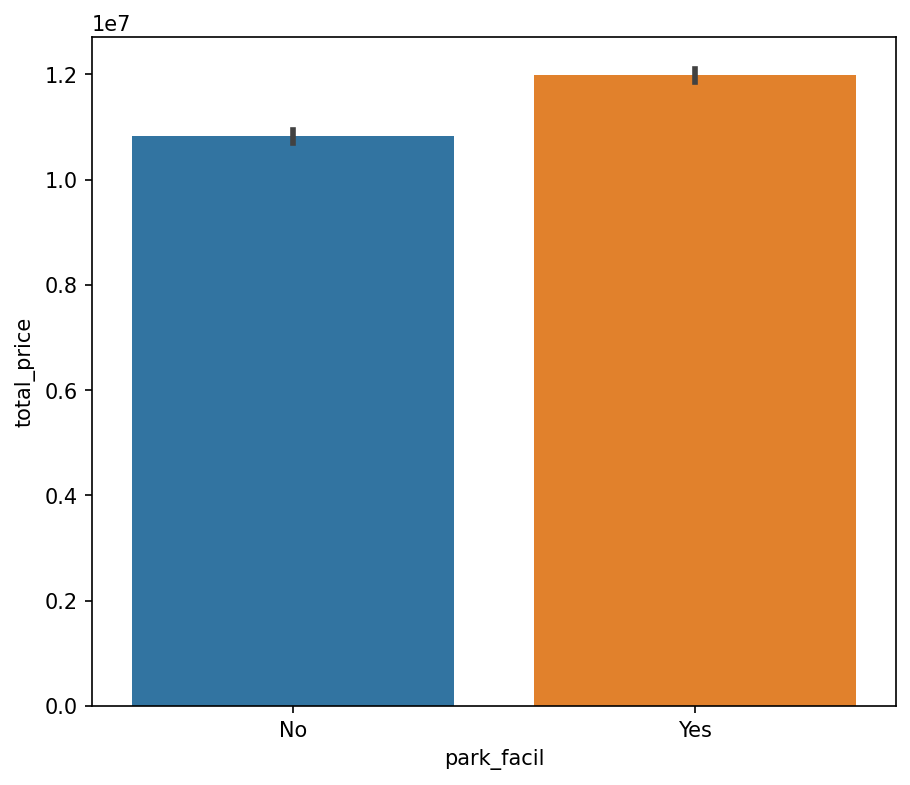

In [99]:
plt.figure(figsize=(22, 13), dpi=150)
plt.subplot2grid((2,6),(0,0), colspan=2)
sns.barplot(x=df.park_facil, y=df.total_price, order=df.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

In [100]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'date_build', 'buildtype',
       'utility_avail', 'street', 'mzzone', 'qs_rooms', 'qs_bathroom',
       'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price',
       'inf_price', '1+0.04', 'property_age', 'total_price'],
      dtype='object')

**ENCODING**

ONE HOT ENCODING

In [101]:
dummies = pd.get_dummies(df.buildtype)


In [102]:
merged = pd.concat([df,dummies],axis='columns')


In [103]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'date_build', 'buildtype',
       'utility_avail', 'street', 'mzzone', 'qs_rooms', 'qs_bathroom',
       'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price',
       'inf_price', '1+0.04', 'property_age', 'total_price'],
      dtype='object')

In [104]:
df = merged.drop(['buildtype','Others'],axis='columns')

In [105]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'date_build', 'utility_avail',
       'street', 'mzzone', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
       'qs_overall', 'reg_fee', 'commis', 'sales_price', 'inf_price', '1+0.04',
       'property_age', 'total_price', 'Commercial', 'House'],
      dtype='object')

LABEL ENCODING

In [106]:
from sklearn.preprocessing import LabelEncoder




In [107]:
label = LabelEncoder()

In [108]:
df.head()


,prt_id,area,int_sqft,date_sale,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,...,qs_overall,reg_fee,commis,sales_price,inf_price,1+0.04,property_age,total_price,Commercial,House
0,P09411,Anna Nagar,1986,2006-12-19,2.0,1.0,5,Ab Normal,No,1995-12-22,...,3.765,760122,304049,21717770,40676975.91,1.04,11,22781941,1,0
1,P05346,Velachery,1855,2010-03-13,3.0,2.0,5,Family,No,1988-03-18,...,4.010,356321,77042,9630290,15418404.56,1.04,22,10063653,0,0
2,P00219,Chrompet,1220,2014-09-11,2.0,1.0,4,Partial,No,2009-09-12,...,3.320,409027,198316,12394750,16963071.24,1.04,5,13002093,1,0
3,P09105,Chrompet,1167,2007-04-05,1.0,1.0,3,Partial,No,1979-04-12,...,2.670,263152,33955,8488790,15287831.22,1.04,28,8785897,0,0
4,P09679,Velachery,1847,2006-03-13,3.0,2.0,5,Family,No,1996-03-15,...,3.260,604809,235204,16800250,31466553.17,1.04,10,17640263,1,0


In [109]:
df['area'] = label.fit_transform(df.area)


In [110]:
df['sale_cond'] = label.fit_transform(df['sale_cond'])

In [111]:
df['park_facil'] = label.fit_transform(df['park_facil'])

In [112]:
df['utility_avail'] = label.fit_transform(df['utility_avail'])

In [113]:
df['street'] = label.fit_transform(df['street'])

In [114]:
df['mzzone'] = label.fit_transform(df['mzzone'])

In [115]:
df.head(3)

,prt_id,area,int_sqft,date_sale,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,...,qs_overall,reg_fee,commis,sales_price,inf_price,1+0.04,property_age,total_price,Commercial,House
0,P09411,1,1986,2006-12-19,2.0,1.0,5,0,0,1995-12-22,...,3.765,760122,304049,21717770,40676975.91,1.04,11,22781941,1,0
1,P05346,6,1855,2010-03-13,3.0,2.0,5,2,0,1988-03-18,...,4.010,356321,77042,9630290,15418404.56,1.04,22,10063653,0,0
2,P00219,2,1220,2014-09-11,2.0,1.0,4,4,0,2009-09-12,...,3.320,409027,198316,12394750,16963071.24,1.04,5,13002093,1,0


Dropping the unwanted columns

In [116]:
df.drop(['prt_id','qs_overall','qs_rooms','qs_bathroom','qs_bedroom','reg_fee','date_sale','date_build','inf_price','1+0.04'], axis=1, inplace=True)

In [117]:
df.columns



Index(['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'sale_cond',
       'park_facil', 'utility_avail', 'street', 'mzzone', 'commis',
       'sales_price', 'property_age', 'total_price', 'Commercial', 'House'],
      dtype='object')

**SPLITTING**

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x = ['area', 'int_sqft', 'n_bedroom', 'n_bathroom',  'n_room', 'sale_cond', 'park_facil', 'utility_avail',
       'street', 'mzzone', 'property_age', 'Commercial', 'House']
        
      
y = 'sales_price'
y1 = 'total_price'

input = df[x].copy()
target = df[y].copy()
target1 = df[y1].copy()




In [120]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

**SCALING**

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**MODELLING**

LINEAR REGRESSION

In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)



LinearRegression()

In [123]:
print(regressor.intercept_)

10887093.20428774


In [124]:
print(regressor.coef_)

[ -535835.09532148  1868406.07054341 -1116983.7084166   -468894.65308572
  1680372.73146198  -158458.93510483   517821.32614306   -88716.20535641
  -218080.40183125   992079.12621868  -192869.88482658  1862139.38204737
  -330945.59911366]


In [125]:
y_pred = regressor.predict(x_test)
y_pred

array([11951755.27948051, 18687830.69564914,  9230531.35239194, ...,
        9604781.62943532,  4986712.59491086, 17578832.94467162])

In [126]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('R2:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 894526.3401431201
Mean Squared Error: 1343483037014.3215
R2: 0.9046158424626901


K NEAREST NEIGHBOUR

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import math
from math import sqrt
from sklearn.metrics import mean_squared_error 

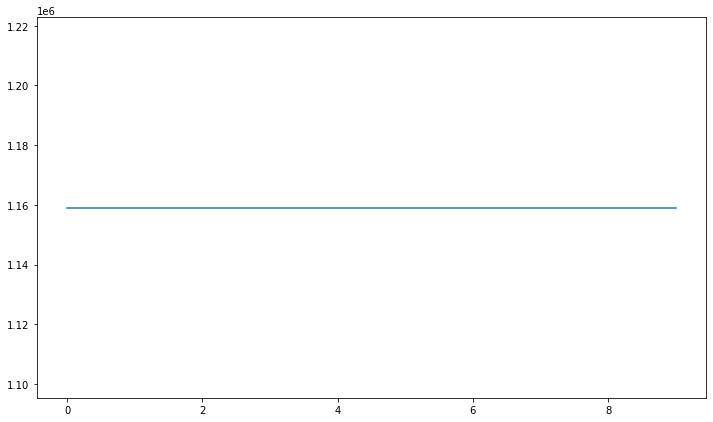

In [128]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)



plt.figure(figsize=(12,7))
plt.plot(curve)
plt.show()

In [129]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

R2- SCORE: 0.8523827399964499


Decision Tree

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE: 0.9672131327700093


RANDOM FOREST

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(x_train, y_train);
y_pred_rf = rf.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))


R2- SCORE: 0.9831535436884358


VOTTING REGRESSOR

In [146]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(x_train, y_train);
y_pred_vr = vr.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

R2- SCORE: 0.9853188445587754


EXTRATREE REGRESSOR

In [137]:
from sklearn.ensemble import ExtraTreesRegressor

In [138]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)
y_pred_etr = etr.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

R2- SCORE: 0.9892931593358254


GRADIENT BOOSTING REGRESSOR

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

In [140]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(x_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Test score : ", model.score(x_test,y_test))

Learning rate :  0.1  Train score :  0.9865253895784818  Test score :  0.9830733993971593
Learning rate :  0.3  Train score :  0.9959049777933984  Test score :  0.994191919206524
Learning rate :  0.5  Train score :  0.9961129456159122  Test score :  0.9945658752793649
Learning rate :  0.8  Train score :  0.9972068157588577  Test score :  0.9955813909701469
Learning rate :  1  Train score :  0.995933451885093  Test score :  0.9914118395077504


In [142]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))


R2- SCORE: 0.9945675782259102


XG BOOST

In [143]:
import xgboost as xgb

In [144]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Test score : ", model.score(x_test,y_test))

Learning rate :  0.2  Train score :  0.9950909852420312  Test score :  0.9932933098352837
Learning rate :  0.5  Train score :  0.9960133427847336  Test score :  0.9944410095251883
Learning rate :  0.7  Train score :  0.9959237546792402  Test score :  0.9932931549497811
Learning rate :  0.8  Train score :  0.996969732393366  Test score :  0.9951909721030775
Learning rate :  1  Train score :  0.9961428452030903  Test score :  0.9936735009675068


In [145]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(x_train, y_train)
y_pred_gbr = xg.predict(x_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))


R2- SCORE: 0.9932931549497811


**INTRPRETATION**


GradientBoostingRegressor give score of 0.99456 as R2-score.
XGBRegressor gives score of 0.99329 as R2-score.
ExtraTreesRegressor gives score of 0.98929 as R2-score.
RandomForestRegressor gives score of 0.98315 as R2-score.
LinearRegression gives score of 0.90461 as R2-score.
KNeighborsRegressor gives score of 0.85238
VotingRegressor gives score of 0.98531 as R2-score.